In [1]:
%matplotlib inline

import pandas as pd
import acquire

df = acquire.get_all_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [2]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'

# pd.to_datetime('now').tz_localize('America/Chicago').strftime(fmt)

df.sale_date = pd.to_datetime(df.sale_date, format=fmt)

# don't forget to sort!
df = df.sort_values(by='sale_date').set_index('sale_date')

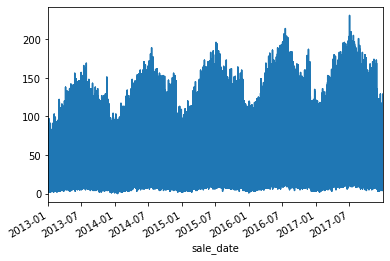

In [3]:
df.sale_amount.plot()

In [5]:
df['month'] = df.index.strftime('%m-%b')
df['weekday'] = df.index.strftime('%w-%a')
df[['month', 'weekday']].head()

,month,weekday
sale_date,,
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue
2013-01-01 00:00:00+00:00,01-Jan,2-Tue


In [6]:
(df.sale_amount.astype('int') == df.sale_amount).all()

True

In [7]:
df.sale_amount = df.sale_amount.astype('int')

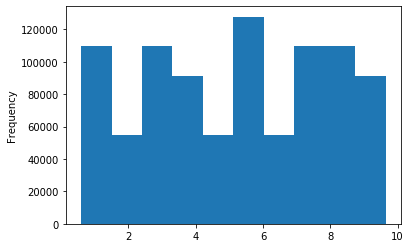

In [8]:
df.item_price.plot.hist()

In [9]:
df['sales_total'] = df.sale_amount * df.item_price

In [11]:
sales_by_day = df.resample('D')[['sales_total']].sum()
sales_by_day.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


In [12]:
sales_by_day['diff_with_last_day'] = sales_by_day.sales_total.diff()
sales_by_day.head()

,sales_total,diff_with_last_day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12


In [13]:
# code from the curriculum's summarize.py module

def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing/rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

def df_value_counts(df):
    counts = pd.Series([])
    for i, col in enumerate(df.columns.values):
        if df[col].dtype == 'object':
            col_count = df[col].value_counts()
        else:
            col_count = df[col].value_counts(bins=10, sort=False)
        counts = counts.append(col_count)
    return counts

def df_summary(df):
    print('--- Shape: {}'.format(df.shape))
    print('--- Info')
    df.info()
    print('--- Descriptions')
    print(df.describe(include='all'))
    print('--- Nulls By Column')
    print(nulls_by_col(df))
    print('--- Nulls By Row')
    print(nulls_by_row(df))
    print('--- Value Counts')
    print(df_value_counts(df))

In [14]:
def prep_store_data(df):
    # parse the date column and set it as the index
    fmt = '%a, %d %b %Y %H:%M:%S %Z'
    df.sale_date = pd.to_datetime(df.sale_date, format=fmt)
    df = df.sort_values(by='sale_date').set_index('sale_date')

    # add some time components as features
    df['month'] = df.index.strftime('%m-%b')
    df['weekday'] = df.index.strftime('%w-%a')

    # derive the total sales
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

def get_sales_by_day(df):
    sales_by_day = df.resample('D')[['sales_total']].sum()
    sales_by_day['diff_with_last_day'] = sales_by_day.sales_total.diff()
    return sales_by_day